CC - Module Python pour le Machine Learning Bekombo IABD B3 Soir

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret as py

In [3]:
data = pd.read_csv("./datasets/Walmart.csv")
data.head()

Store        Date  Daily_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  2010-05-02   1643690.90             0        42.31       2.572   
1      1  2010-12-02   1641957.44             1        38.51       2.548   
2      1  2010-02-19   1611968.17             0        39.93       2.514   
3      1  2010-02-26   1409727.59             0        46.63       2.561   
4      1  2010-05-03   1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
data.isna().sum()

Store           0
Date            0
Daily_Sales     0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [4]:
duplicates = data.duplicated()
duplicates.value_counts()

False    6435
dtype: int64

In [5]:
data.dtypes

Store             int64
Date             object
Daily_Sales     float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Daily_Sales   6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
data.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [8]:
#data['Date'] = pd.to_datetime(data['Date'])
#data

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Daily_Sales   6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [10]:
data

Store        Date  Daily_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  2010-05-02   1643690.90             0        42.31       2.572   
1         1  2010-12-02   1641957.44             1        38.51       2.548   
2         1  2010-02-19   1611968.17             0        39.93       2.514   
3         1  2010-02-26   1409727.59             0        46.63       2.561   
4         1  2010-05-03   1554806.68             0        46.50       2.625   
...     ...         ...          ...           ...          ...         ...   
6430     45  2012-09-28    713173.95             0        64.88       3.997   
6431     45  2012-05-10    733455.07             0        64.89       3.985   
6432     45  2012-12-10    734464.36             0        54.47       4.000   
6433     45  2012-10-19    718125.53             0        56.47       3.969   
6434     45  2012-10-26    760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [11]:
data.describe()

Store   Daily_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [12]:
#df = data.rename(columns={'Weekly_Sales': 'Daily_Sales'})

#csv_data = df.to_csv(index=False)
#with open('Walmart.csv', 'w') as f:
    #f.write(csv_data)
#df

In [4]:
df = data.drop(columns={'Daily_Sales'}, axis=1)
csv_data = df.to_csv(index=False)
with open('./datasets/test_Walmart.csv', 'w') as f:
    f.write(csv_data)

Outliers checking

<Axes: xlabel='Store'>

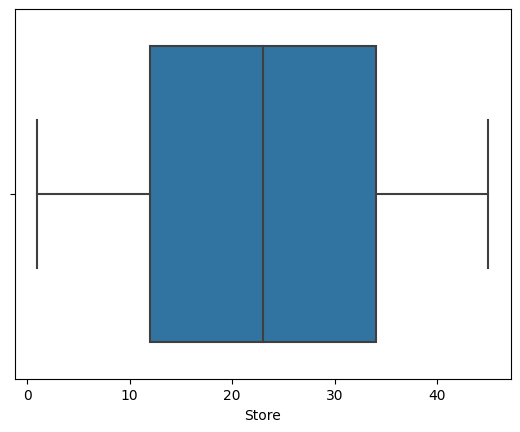

In [13]:
sns.boxplot(data=data, x=data.Store)

<Axes: xlabel='Daily_Sales'>

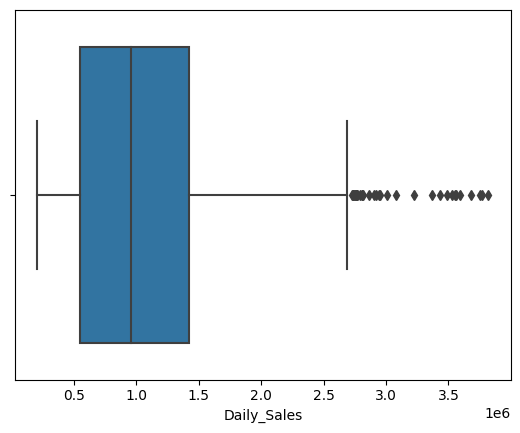

In [14]:
sns.boxplot(data=data, x=data.Daily_Sales)

<Axes: xlabel='Daily_Sales'>

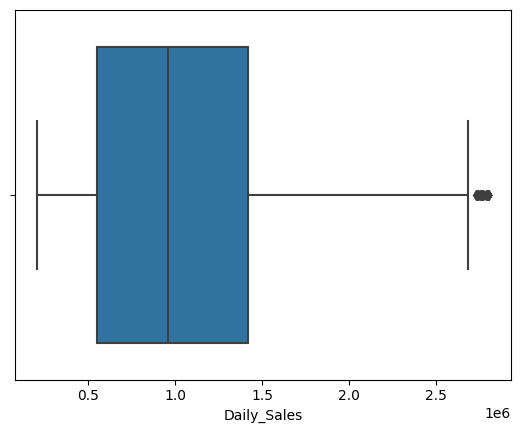

In [15]:
# Identifier les outliers avec la méthode IQR
Q1 = data['Daily_Sales'].quantile(0.25)
Q3 = data['Daily_Sales'].quantile(0.75)
IQR = Q3 - Q1
IQR

k = 1.5  # Facteur de seuil pour définir les outliers
lower_limit = Q1 - k * IQR
upper_limit = Q3 + k * IQR


outliers = data[(data['Daily_Sales'] < lower_limit) | (data['Daily_Sales'] > upper_limit)]
len(outliers)

# Diviser outliers en deux
upper_limit2 = 2800000.00
outliers_contigus = data[(data['Daily_Sales'] > upper_limit) & (data['Daily_Sales'] <= upper_limit2)]
outliers_non_contigus = data[data['Daily_Sales'] > upper_limit2]


data.loc[data['Daily_Sales'] > upper_limit2, 'Daily_Sales'] = upper_limit2

sns.boxplot(data=data,x=data.Daily_Sales)


<Axes: xlabel='Holiday_Flag'>

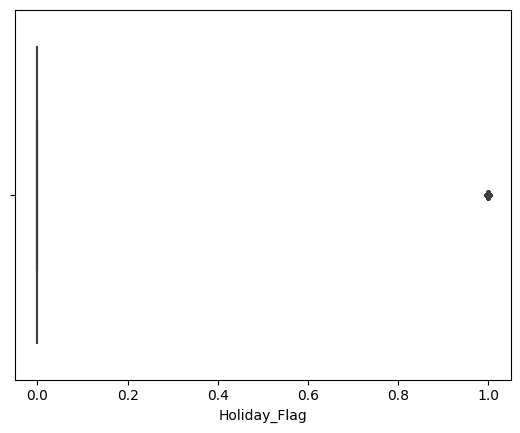

In [16]:
sns.boxplot(data=data, x=data.Holiday_Flag)

<Axes: xlabel='Temperature'>

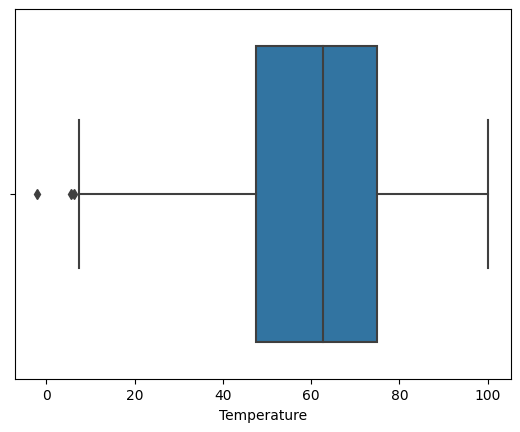

In [17]:
sns.boxplot(data=data, x=data.Temperature)

Nombre d'observations considérées comme des outliers à moins 25% non-contigus :  1


<Axes: xlabel='Temperature'>

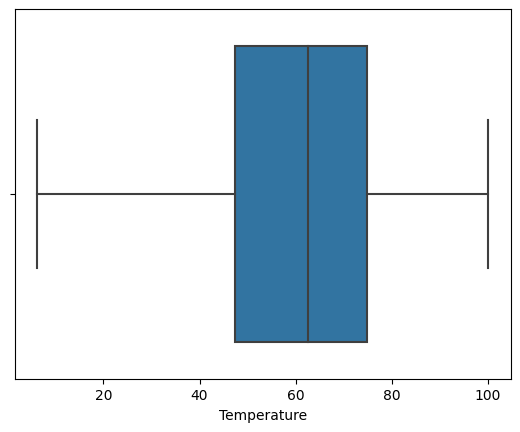

In [18]:
# Identifier les outliers avec la méthode IQR
Q1 = data['Temperature'].quantile(0.25)
Q3 = data['Temperature'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5  # Facteur de seuil pour définir les outliers
lower_limit = Q1 - k * IQR
upper_limit = Q3 + k * IQR

outliers = data[(data['Temperature'] < lower_limit)]

# Diviser les outliers en deux catégories
lower_limit2 = 0

outliers_below_Q1 = data[data['Temperature'] < lower_limit2]
print("Nombre d'observations considérées comme des outliers à moins 25% non-contigus : ", len(outliers_below_Q1))

data.loc[data['Temperature'] < lower_limit, 'Temperature'] = lower_limit

sns.boxplot(data=data,x=data.Temperature)

<Axes: xlabel='Fuel_Price'>

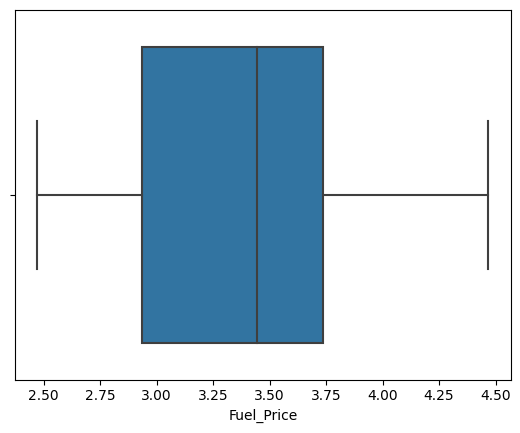

In [19]:
sns.boxplot(data=data,x=data.Fuel_Price)

<Axes: xlabel='CPI'>

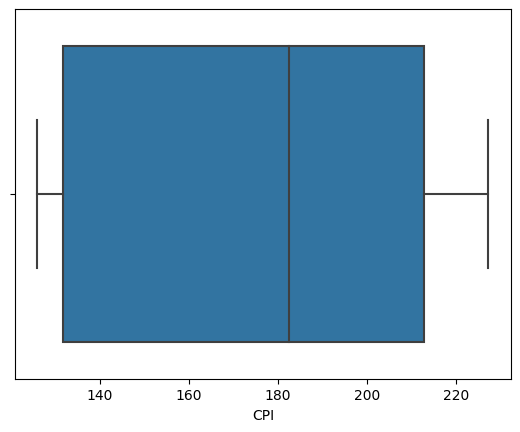

In [20]:
sns.boxplot(data=data,x=data.CPI)

<Axes: xlabel='Unemployment'>

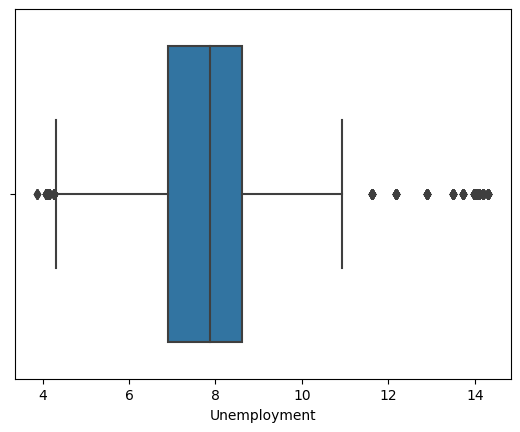

In [21]:
sns.boxplot(data=data,x=data.Unemployment)

Nombre d'observations considérées comme des outliers à plus de 75% non-contigus :  156 

Nombre d'observations considérées comme des outliers à moins 25% non-contigus :  4


<Axes: xlabel='Unemployment'>

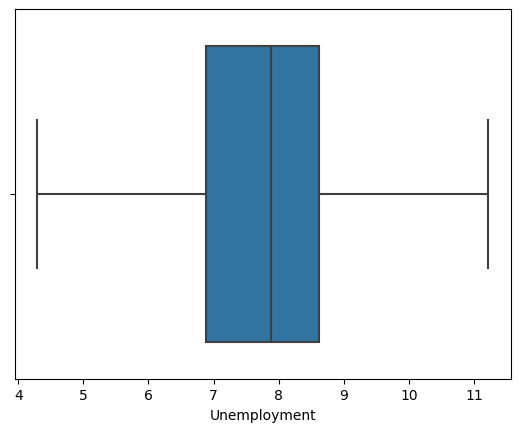

In [22]:
# Identifier les outliers avec la méthode IQR
Q1 = data['Unemployment'].quantile(0.25)
Q3 = data['Unemployment'].quantile(0.75)
IQR = Q3 - Q1

k = 1.5  # Facteur de seuil pour définir les outliers
lower_limit = Q1 - k * IQR
upper_limit = Q3 + k * IQR

outliers = data[(data['Unemployment'] < lower_limit) | (data['Unemployment'] > upper_limit)]

# Diviser les outliers en deux catégories
upper_limit2 = 14
lower_limit2 = 4

outliers_contigus = data[(data['Unemployment'] > upper_limit) & (data['Unemployment'] <= upper_limit2)]
outliers_non_contigus = data[data['Unemployment'] > upper_limit2]
outliers_below_Q1 = data[data['Unemployment'] < lower_limit2]
print("Nombre d'observations considérées comme des outliers à plus de 75% non-contigus : ", len(outliers_non_contigus), "\n")
print("Nombre d'observations considérées comme des outliers à moins 25% non-contigus : ", len(outliers_below_Q1))

data.loc[data['Unemployment'] > upper_limit, 'Unemployment'] = upper_limit
data.loc[data['Unemployment'] < lower_limit, 'Unemployment'] = lower_limit

sns.boxplot(data=data,x=data.Unemployment)

In [23]:
# Extract relevant features from the 'Date' column
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day

#data.drop('Date', axis=1, inplace=True)
#encoded_data = pd.DataFrame([data['Year'],data['Month'], data['DayOfWeek']], columns=(['Year', 'Month', 'DayOfWeek']))

# Concatenate the encoded features with the original DataFrame
#data_encoded = pd.concat([data.drop(['Year', 'Month', 'DayOfWeek'], axis=1), encoded_data], axis=1)
#data_encoded
data

Store        Date  Daily_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  2010-05-02   1643690.90             0        42.31       2.572   
1         1  2010-12-02   1641957.44             1        38.51       2.548   
2         1  2010-02-19   1611968.17             0        39.93       2.514   
3         1  2010-02-26   1409727.59             0        46.63       2.561   
4         1  2010-05-03   1554806.68             0        46.50       2.625   
...     ...         ...          ...           ...          ...         ...   
6430     45  2012-09-28    713173.95             0        64.88       3.997   
6431     45  2012-05-10    733455.07             0        64.89       3.985   
6432     45  2012-12-10    734464.36             0        54.47       4.000   
6433     45  2012-10-19    718125.53             0        56.47       3.969   
6434     45  2012-10-26    760281.43             0        58.85       3.882   

             CPI  Unemployment  Year  Month  Day  
0     211.096358         8.106  2010      5    2  
1     211.242170         8.106  2010     12    2  
2     211.289143         8.106  2010      2   19  
3     211.319643         8.106  2010      2   26  
4     211.350143         8.106  2010      5    3  
...          ...           ...   ...    ...  ...  
6430  192.013558         8.684  2012      9   28  
6431  192.170412         8.667  2012      5   10  
6432  192.327265         8.667  2012     12   10  
6433  192.330854         8.667  2012     10   19  
6434  192.308899         8.667  2012     10   26  

[6435 rows x 11 columns]

In [24]:
data = data.drop(['Date'],axis=1)

In [25]:
data

Store  Daily_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0         1   1643690.90             0        42.31       2.572  211.096358   
1         1   1641957.44             1        38.51       2.548  211.242170   
2         1   1611968.17             0        39.93       2.514  211.289143   
3         1   1409727.59             0        46.63       2.561  211.319643   
4         1   1554806.68             0        46.50       2.625  211.350143   
...     ...          ...           ...          ...         ...         ...   
6430     45    713173.95             0        64.88       3.997  192.013558   
6431     45    733455.07             0        64.89       3.985  192.170412   
6432     45    734464.36             0        54.47       4.000  192.327265   
6433     45    718125.53             0        56.47       3.969  192.330854   
6434     45    760281.43             0        58.85       3.882  192.308899   

      Unemployment  Year  Month  Day  
0            8.106  2010      5    2  
1            8.106  2010     12    2  
2            8.106  2010      2   19  
3            8.106  2010      2   26  
4            8.106  2010      5    3  
...            ...   ...    ...  ...  
6430         8.684  2012      9   28  
6431         8.667  2012      5   10  
6432         8.667  2012     12   10  
6433         8.667  2012     10   19  
6434         8.667  2012     10   26  

[6435 rows x 10 columns]

In [26]:
data.dtypes

Store             int64
Daily_Sales     float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
Year              int64
Month             int64
Day               int64
dtype: object

Pycaret Linear Regression Model Elaboration

In [27]:
from pycaret.regression import *

In [28]:
reg = setup(data, target='Daily_Sales', normalize=True, normalize_method='minmax')

In [29]:
compare_models()

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto',
             random_state=8701, reg_alpha=0, reg_lambda=1, ...)

In [30]:
model=create_model("xgboost")

Initiated  . . . . . . . . . . . . . . . . . .             18:08:49
Status     . . . . . . . . . . . . . . . . . .  Selecting Estimator
Estimator  . . . . . . . . . . . . . . . . . .    Compiling Library

In [31]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [32]:
tune_model(model, search_library='optuna')

Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100,
             n_jobs=-1, num_parallel_tree=1, predictor='auto',
             random_state=8701, reg_alpha=0, reg_lambda=1, ...)

Daily Sales based on period between two dates

In [33]:
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2010-01-10')

filtered_df = data[(data['Year'] >= start_date.year) & (data['Month'] >= start_date.month) & (data['Day'] >= start_date.day) &
                   (data['Year'] <= end_date.year) & (data['Month'] <= end_date.month) & (data['Day'] <= end_date.day)]
filtered_df

Store  Daily_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
34        1   1453329.50             0        71.89       2.603  211.671989   
177       2   1827440.43             0        69.24       2.603  211.329874   
320       3    358784.10             0        73.60       2.603  214.984655   
463       4   1842821.02             0        63.96       2.619  126.234600   
606       5    283178.12             0        71.10       2.603  212.226946   
749       6   1328468.89             0        70.69       2.603  213.190713   
892       7    448998.73             0        49.99       2.759  190.673824   
1035      8    804105.49             0        68.70       2.603  215.031003   
1178      9    495692.19             0        69.08       2.603  215.214134   
1321     10   1645892.97             0        86.01       3.001  126.234600   
1464     11   1182490.46             0        75.11       2.603  214.984655   
1607     12    850936.26             0        85.20       3.001  126.234600   
1750     13   1765584.48             0        68.74       2.853  126.234600   
1893     14   1855703.66             0        70.58       2.707  182.716838   
2036     15    566945.95             0        59.69       2.840  132.756800   
2179     16    463977.54             0        59.39       2.759  190.673824   
2322     17    829207.27             0        60.07       2.853  126.234600   
2465     18    948977.50             0        67.76       2.717  132.756800   
2608     19   1379456.30             0        59.91       2.840  132.756800   
2751     20   1933719.21             0        61.08       2.707  204.885097   
2894     21    677158.39             0        70.28       2.603  211.329874   
3037     22    905987.17             0        69.31       2.717  136.629757   
3180     23   1129909.44             0        62.07       2.717  132.756800   
3323     24   1215273.20             0        66.88       2.840  132.756800   
3466     25    658640.14             0        57.56       2.707  204.885097   
3609     26    923221.52             0        57.80       2.717  132.756800   
3752     27   1543532.83             0        70.19       2.840  136.629757   
3895     28   1203080.41             0        85.20       3.001  126.234600   
4038     29    474698.01             0        69.31       2.717  132.756800   
4181     30    445475.30             0        70.28       2.603  211.329874   
4324     31   1213981.64             0        70.28       2.603  211.329874   
4467     32   1061089.56             0        66.14       2.759  190.673824   
4610     33    224294.39             0        91.45       3.001  126.234600   
4753     34    865709.11             0        70.13       2.619  126.234600   
4896     35    771065.21             0        70.19       2.707  136.629757   
5039     36    422169.47             0        74.66       2.567  210.440443   
5182     37    529877.93             0        74.66       2.603  210.440443   
5325     38    360256.58             0        85.20       3.001  126.234600   
5468     39   1219583.91             0        72.74       2.603  210.440443   
5611     40    891152.33             0        62.01       2.717  132.756800   
5754     41   1109216.35             0        62.67       2.759  190.673824   
5897     42    481523.93             0        86.01       3.001  126.234600   
6040     43    657108.77             0        77.93       2.603  203.593429   
6183     44    300152.45             0        68.74       2.853  126.234600   
6326     45    690007.76             0        70.58       2.707  182.716838   

      Unemployment  Year  Month  Day  
34          7.8380  2010      1   10  
177         8.1630  2010      1   10  
320         7.5640  2010      1   10  
463         7.1270  2010      1   10  
606         6.7680  2010      1   10  
749         7.0070  2010      1   10  
892         9.1370  2010      1   10  
1035        6.4330  2010      1   10  
1178        6.5600  

Let'us Try to predict Daily_Sales

In [34]:
#data['Date'] = pd.to_datetime(data['Date'])
# Make predictions on new data
new_data = pd.DataFrame([[45, 0, 70.58, 2.707, 182.716838, 8.724, 2010, 1, 10]],
                        columns=['Store', 'Holiday_Flag', 'Temperature',
                                 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day'])
new = [[45, 1, 29.67, 3.179, 182.571448, 8.724, 2010, 12, 31]]
#prediction = model.predict(np.array(pd.DataFrame(new)))
#print('Predicted number of sales: ', prediction)
predictions = predict_model(model, data=new_data)

# View the predicted values
y_temp_predict = predictions['prediction_label'].values[0]
print(f" The predicted Daily Sales are :$ {np.round(y_temp_predict)}")


 The predicted Daily Sales are :$ 688340.0


In [37]:
save_model(model,"./models/Walmart")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Store', 'Holiday_Flag',
                                              'Temperature', 'Fuel_Price', 'CPI',
                                              'Unemployment', 'Year', 'Month',
                                              'Day'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWr...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_dept

In [35]:
import pickle
pickle.dump(model, open('./models/walmart_model.pkl', 'wb'))

Monsieur j'ai choisi d'utiliser sur streamlit le model sans dump ceci pour une bonne raison.Pour la prediction juste avant le save model nous avons comme daily sales: **$688340.0**. Sur Streamlit, nous avons **$688339.6** avec le model sans dump.Tandis qu'avec le model pickle dumpé on a **$620000.0** ce qui est trop éloigné de notre valeur réelle qui est: **$690007.76**.

2024 - All rights reserved - Bekombo Ntone Louis Jason Loic Walmart Daily_Sales Prediction Notebook